# Observations

- No missing values (good)
- There are features with slight colleration w.r.t. the Attrition (they are also explainable)
- There are three features immediately to be dropped because of 1 distinct value
- We are left with 19 categorical and 13 numerical features
- ID type of feature is also excluded (numerical features down to 12)
- Number of numerical features gone up to 23, nominals down to 7, because of instructions

In [94]:
import pandas as pd
import sweetviz as sv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.metrics import precision_recall_fscore_support as prf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import GradientBoostingClassifier as GBC

In [13]:
df = pd.read_csv("use_case_employee-attrition.csv")
df = df.drop(["EmployeeCount", "Over18", "StandardHours", "EmployeeNumber"], axis=1)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [14]:
report = sv.analyze(df)
report.show_html("report.html", open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated.


In [17]:
# Feature classified into nominal, numerical types

nominals = ["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "OverTime"]
numericals = ["Age", "DailyRate", "DistanceFromHome", "Education", "EnvironmentSatisfaction", "HourlyRate", "JobInvolvement", "JobLevel", "JobSatisfaction", "MontlyIncome", "MonthlyRate", "NumCompaniesWorked",
              "PercentSalaryHike", "PerformanceRating", "RelationshipSatisfaction", "StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear", "WorkLifeBalance", "YearsAtCompany", "YearsInCurrentRole", 
              "YearsSinceLastPromotion", "YearsWithCurrManager"]
# 3 3 6 2 9 3 2

In [10]:
df["Attrition"].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [18]:
df_n = df.drop(nominals, axis=1)
df_n

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,1102,1,2,2,94,3,2,4,...,3,1,0,8,0,1,6,4,0,5
1,49,No,279,8,1,3,61,2,2,2,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,1373,2,2,4,92,2,1,3,...,3,2,0,7,3,3,0,0,0,0
3,33,No,1392,3,4,4,56,3,1,3,...,3,3,0,8,3,3,8,7,3,0
4,27,No,591,2,1,1,40,3,1,2,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,884,23,2,3,41,4,2,4,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,613,6,1,4,42,2,3,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,155,4,3,2,87,4,2,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,1023,2,3,4,63,2,2,2,...,3,4,0,17,3,2,9,6,0,8


In [19]:
X = df_n.drop("Attrition", axis=1)
y = df_n["Attrition"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)

In [102]:
knn = KNC(n_neighbors=5, weights="distance")
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))
y_pred = knn.predict(X_test)

0.8163265306122449


In [103]:
prf(y_test, y_pred)

(array([0.86363636, 0.4       ]),
 array([0.92682927, 0.25      ]),
 array([0.89411765, 0.30769231]),
 array([123,  24], dtype=int64))

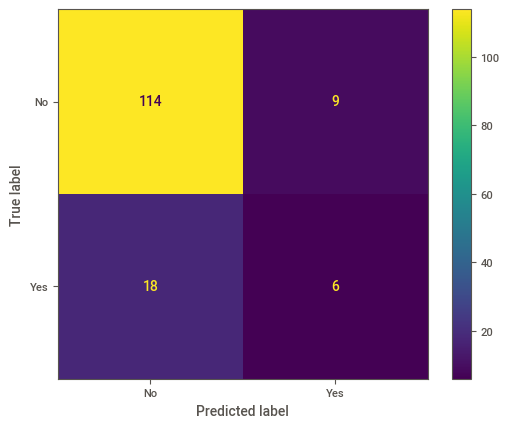

In [104]:
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

In [98]:
rfc = RFC(random_state=42)
rfc.fit(X_train, y_train)
print(rfc.score(X_test, y_test))
y_pred = rfc.predict(X_test)

0.8435374149659864


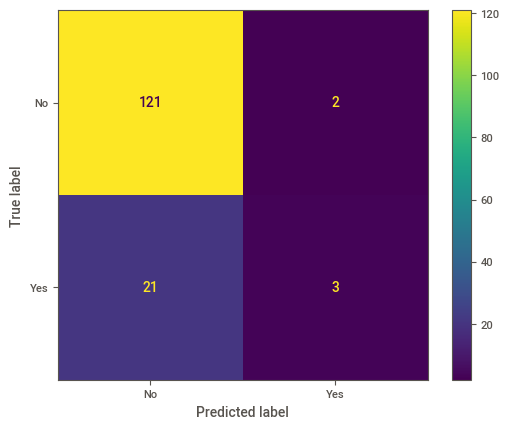

In [99]:
cm = confusion_matrix(y_test, y_pred, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot()

In [100]:
gbc = GBC(random_state=42)
gbc.fit(X_train, y_train)
print(gbc.score(X_test, y_test))
y_pred = gbc.predict(X_test)

0.8639455782312925


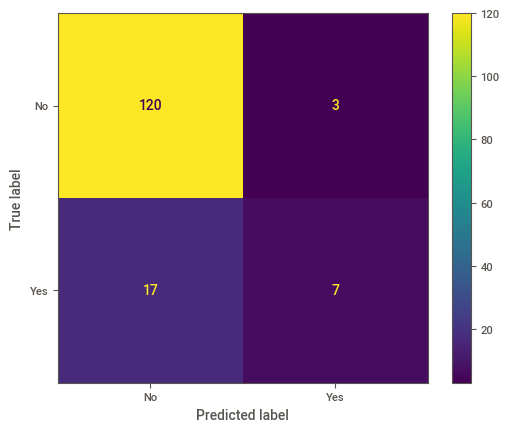

In [101]:
cm = confusion_matrix(y_test, y_pred, labels=gbc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gbc.classes_)
disp.plot()